### Training a Linear Regression - using the closed-form

Text(0, 0.5, 'Y')

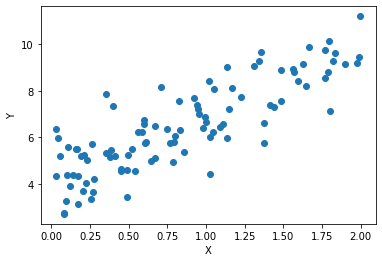

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1) #y = 4 + 3x + noise

plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('Y')

#### Using the normal equation


In [ ]:
X_b = np.c_[np.ones((100,1)),X] #add x0=1 to take the intercept into consideration
theta_hat = np.linalg.inv(np.transpose(X_b).dot(X_b)).dot(np.transpose(X_b)).dot(y)
print('Theta Hat: ',theta_hat)

Theta Hat:  [[4.0979248 ]
 [2.80057606]]


In [ ]:
#new prediction
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
pred = X_new_b.dot(theta_hat)
pred

array([[4.0979248 ],
       [9.69907692]])

(0.0, 2.0, 0.0, 15.0)

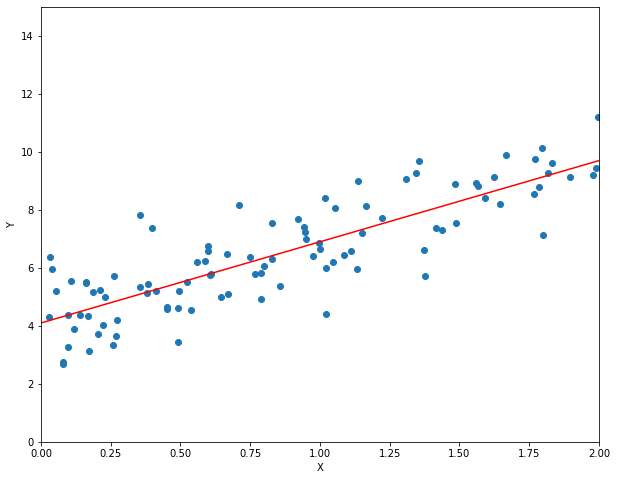

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(X,y)
plt.plot(X_new,pred,'r-')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis([0,2,0,15])

#### Using Scikit-learn

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
print('Coefficients:',lr.coef_, lr.intercept_)

Coefficients: [[2.80057606]] [4.0979248]


In [ ]:
lr.predict(X_new)

array([[4.0979248 ],
       [9.69907692]])

### Training a linear regression  - using Gradient Descent
- optimization technique much faster than Normal Equation or SVD decomposition
- this technique is highly affected by the features scales... high-scaled features makes the cost function abruptly decay, however small-scaled features makes this decay almost flat, making the convergence slow. 
    - It is very important to scale features when we know in advance that Gradient Descent will be used!
- Gradient is a vector containing the partial derivatives of the cost function with regard to every model parameter!


#### Batch Gradient Descent
- Uses the whole training data set during optimization procedure

In [ ]:
import numpy as np
learning_rate = 0.1
n_iterations = 1000
m = 100

theta = np.random.rand(2,1)
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)
X_b = np.c_[np.ones((100,1)),X] #add x0=1 to take the intercept into consideration

for iteration in range(n_iterations):
    gradient = (2/m)*X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate*gradient

print('Optimum Theta:',theta)

Optimum Theta: [[3.81207615]
 [3.01494449]]


#### Stochastic Gradient Descent
- uses only one instance per step and this makes the process much faster than Batch GD
- due to its random nature, this technique is prone to more oscillations, so that we can find good minimum, but not optimal, as Batch Gradient Descent
- learning schedule: the function that reduces the learning rate as we move forward on the steps in order to minimize the effect of the oscillations

In [ ]:
n_epochs = 50
t0,t1 = 5,50

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs): #each epoch is formed by rounds of m iterations
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta) - yi)
        learning_rate = learning_schedule(epoch*m + i)
        theta = theta - learning_rate*gradients

print(theta)

[[3.80570162]
 [3.00260441]]


In [ ]:
#implementation using scikit-learn
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000,
                       tol=1e-3,
                       penalty=None,
                       eta0=0.1)
sgd_reg.fit(X,y.ravel())
print(sgd_reg.intercept_, sgd_reg.coef_)

[3.86437452] [3.07564617]


### Polynomial Regression

In [ ]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5*X**2 + X + 2 + np.random.randn(m,1)

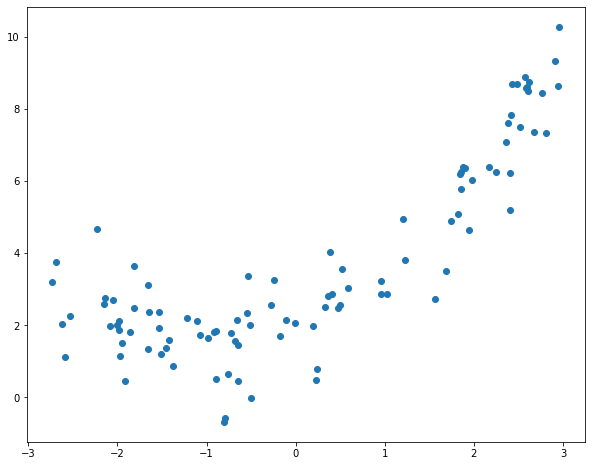

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(X,y)

In [ ]:
#add non-linear terms to X
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
print(X[0])
print(X_poly[0])

[2.51479534]
[2.51479534 6.32419561]


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_poly,y)
print(lr.intercept_, lr.coef_) #estimated coefs and intercept similar to the original y

[1.95441799] [[0.97037971 0.5163717 ]]


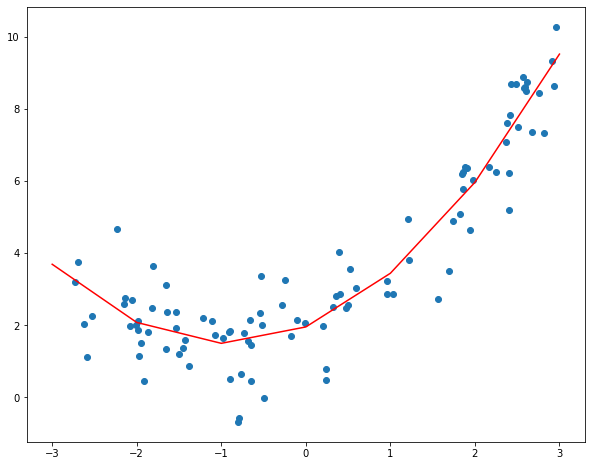

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(X,y)
plt.plot(np.arange(-3,4).reshape(-1,1), lr.predict(poly.fit_transform(np.arange(-3,4).reshape(-1,1))),
        'r-')

### Learning curves
- it corresponds to an approach to verify overfitting or underfitting profiles, where we plot the errors on the training and validation sets as a function of the size of training set used

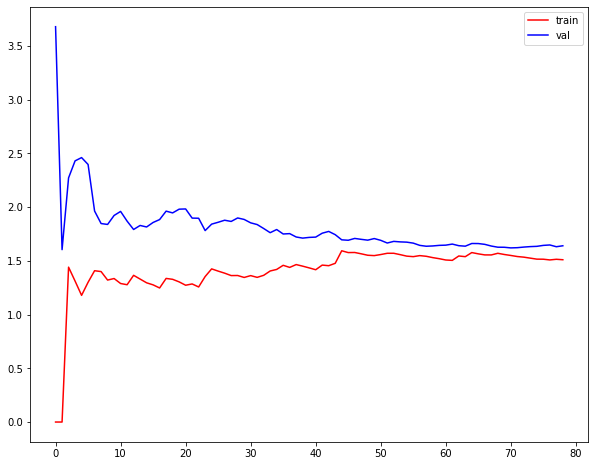

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(X,y,random_state=42, test_size=.2)
train_error_list, val_error_list = [],[]
for n in range(1,len(x_train)):
    lr = LinearRegression()
    lr.fit(x_train[:n],y_train[:n])
    preds_train = lr.predict(x_train[:n])
    preds_val = lr.predict(x_val)
    error_train = mean_squared_error(y_train[:n],preds_train)
    error_val = mean_squared_error(y_val,preds_val)
    train_error_list.append(error_train)
    val_error_list.append(error_val)

plt.figure(figsize=(10,8))
plt.plot(np.sqrt(train_error_list),'r-',label='train')
plt.plot(np.sqrt(val_error_list),'b-',label='val')
plt.legend()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
    x_train, x_val, y_train, y_val = train_test_split(X,y,random_state=42, test_size=.2)
    train_error_list, val_error_list = [],[]
    for n in range(1,len(x_train)):
        model.fit(x_train[:n],y_train[:n])
        preds_train = model.predict(x_train[:n])
        preds_val = model.predict(x_val)
        error_train = mean_squared_error(y_train[:n],preds_train)
        error_val = mean_squared_error(y_val,preds_val)
        train_error_list.append(error_train)
        val_error_list.append(error_val)
    plt.figure(figsize=(10,8))
    plt.plot(np.sqrt(train_error_list),'r-',label='train')
    plt.plot(np.sqrt(val_error_list),'b-',label='val')
    plt.xlabel('Training size')
    plt.ylabel('RMSE')
    plt.legend()

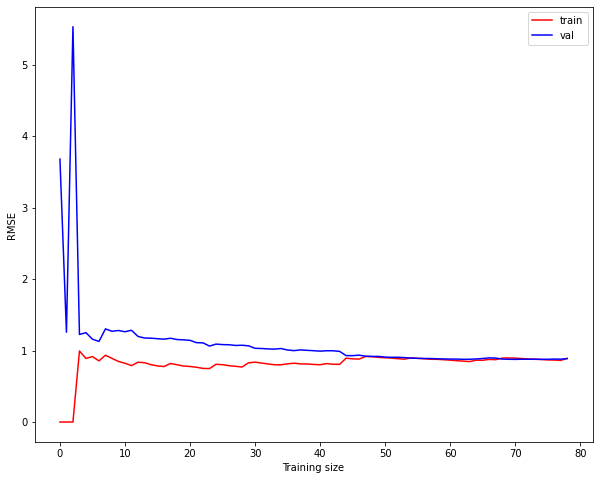

In [ ]:
#example of balanced model
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('poly',PolynomialFeatures(degree=2,include_bias=False)),
    ('lr',LinearRegression())
])

plot_learning_curves(pipe,X,y)

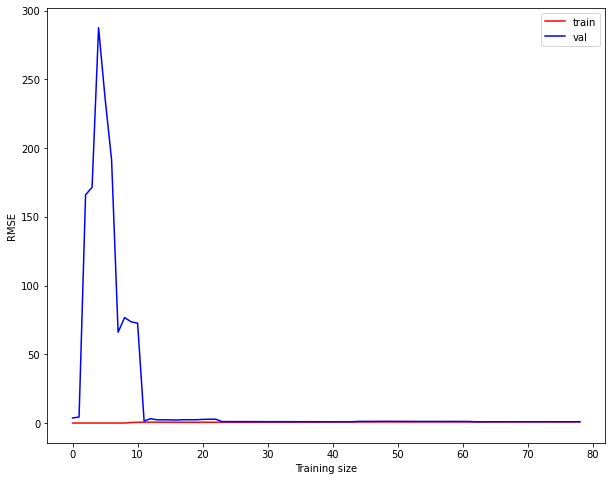

In [ ]:
#example of overfitting model
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('poly',PolynomialFeatures(degree=8,include_bias=False)),
    ('lr',LinearRegression())
])

plot_learning_curves(pipe,X,y)

### Regularization techniques  - Linear Models
- regularization in linear models means constraining the weights
- Types: Ridge, Lasso and ElasticNet

#### Ridge
- it adds a regularization term to the cost function (e.g MSE) in order to keep the weights as small as possible
- term = 1/2 * alpha * summation (theta_i)^2, 
    - where i ranges from 1 to n, where n is the number of features
- the smaller the alpha is, the less regularized the model becomes
- a large alpha means that all coefficients are nearly zero and the model is basically a straight line at the mean value 

In [ ]:
#closed form-solution
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[5.3405605]])

In [ ]:
#using gradient descent
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty='l2') #applies Ridge regularization
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([5.31786481])

#### Lasso

- it adds a regularization term to the cost function (e.g MSE) in order to keep the weights as small as possible
- term = alpha * summation (abs[(theta_i)]), 
    - where i ranges from 1 to n, where n is the number of features
- a unique feature of Lasso regularization technique is that it can set some coefficients to zero (these cofficients correspond to least important features)

In [ ]:
#closed form-solution
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([5.30130578])

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty='l1')
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([5.33952409])

#### Elastic Net
- this technique is a mix of Ridge and Lasso, since it can have both effects , depending on the mix ratio. If ratio = 0, then we only have influence of Ridge regularization. If ratio = 1, then we only have influence of Lasso.

- Elastic Net performs better than Lasso if we have more features that training instance or if the features are highly correlated

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([5.29715782])

### Early Stopping

- It aims to monitor the training and validation errors such that when the validation error starts increasing after a successive decreasing, it is a sign to stop the training procedure and use the model parameters just before the error increase.

### Logistic Regression
- it is a classic model for classification tasks
- it is called 'regression' due to the fact that it is a weighted sum of the input features, where the weights are the coefficients plus the bias term (just like a Linear Regression)
- the main difference here is that the output is a probability instead of a continous value
- the probability is obtained by applying the logistic function (a sigmoid function) to the weighted sum
- once we have the probability, we are able to classify each instance based on a desired threshold (e.g 0.5)
    - if p >= 0.5, then y = 1, else y = 0

- the cost function is called log loss
    - it can be optimized using Gradient Descent and because it is a convex function, we will find the global optimum if we choose an appropriate learning rate and wait long enough

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
X = iris['data'][:,3:] #petal_width
y = (iris['target'] == 2).astype('int64')

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

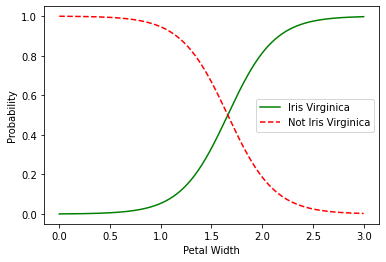

In [ ]:
import matplotlib.pyplot as plt
X_new = np.linspace(0,3,1000).reshape(-1,1)
preds = log_reg.predict_proba(X_new)
plt.plot(X_new,preds[:,1],'g-',label='Iris Virginica')
plt.plot(X_new,preds[:,0],'r--',label='Not Iris Virginica')
plt.xlabel('Petal Width')
plt.ylabel('Probability')
plt.legend()

Above 2cm the model is confident that the flower is Iris Virginica and below 1cm the model is confident that the flower is not Iris Virginica. However, around 1.6cm, there is an overlap and this is called a decision boundary (50% chance of being Iris Virginica)

### Softmax regression
- in many situations we deal with classification tasks with more than 2 classes. 
- Logistic Regression can natively handle this situation
- The idea behind the decisions made by the algorithm relies on the concept of scores. For each class k, the algorithm computes the score, given by the product between the vector of features and the coefficients for the given class k.
- Once we have each score, we can calculate the probability of each instance x belonging to each class k, by computing the normalized exponential (check out this link https://en.wikipedia.org/wiki/Softmax_function)
- With the probabilities in our hands, the algorithm assigns the instance x to the class k with the highest value of the vector of probabilities obtained in the last step

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris['data'][:,(2,3)] #uses petal length and petal width as features
y = iris['target']

In [2]:
from sklearn.linear_model import LogisticRegression
softmax = LogisticRegression(multi_class='multinomial',solver='lbfgs',C=10)
softmax.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [3]:
softmax.predict([[5,2]])

array([2])

In [4]:
softmax.predict_proba([[5,2]]) #the class = 2 is the one which the probability is maximum

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2b7eb737-18d4-4683-a9e5-3ea902dd423b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>